In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
F=6
L=8
N = (L+F)*100

In [3]:
model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
data1=dict(N=N)
result1 = model1.sample(data=data1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [5]:
x=result1.draws_pd()
x=x.iloc[:,3:]
xm=x.mean()


In [6]:
model2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
data2=dict(N=N)
result2 = model2.sample(data=data2)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [8]:
y=result2.draws_pd()
y=y.iloc[:,4205:]
ym=y.mean(axis=0)


In [9]:
model3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
data31=dict(N=N,y=xm)
data32=dict(N=N,y=ym)
result31 = model3.sample(data=data31)
result32 = model3.sample(data=data32)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
model4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
data41=dict(N=N,y=xm)
result41 = model4.sample(data=data41)
data42=dict(N=N,y=ym)
result42 = model4.sample(data=data42)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [13]:
az.loo(result31)

Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo  3031.91    24.65
p_loo        1.91        -

In [14]:
az.loo(result32)

Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo  2527.54    27.05
p_loo        2.09        -

In [15]:
az.waic(result31)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic  3031.91    24.65
p_waic        1.91        -

In [16]:
az.waic(result32)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic  2527.54    27.05
p_waic        2.09        -

In [17]:
az.loo(result41)

Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo  3029.42    24.67
p_loo        1.87        -

In [18]:
az.loo(result42)

Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo  2527.33    27.09
p_loo        2.21        -

In [19]:
az.waic(result41)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic  3029.42    24.67
p_waic        1.87        -

In [20]:
az.waic(result42)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic  2527.33    27.09
p_waic        2.21        -

In [21]:
a31=az.from_cmdstanpy(result31)
a41=az.from_cmdstanpy(result41)
a32=az.from_cmdstanpy(result32)
a42=az.from_cmdstanpy(result42)

In [51]:
w3=az.compare({"1":a31,"2":a32})
w3

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,3031.906392,1.911827,0.00000,0.932925,24.651815,0.000000,False,log
2,1,2527.537182,2.086629,504.36921,0.067075,27.047722,36.415447,False,log


<AxesSubplot:xlabel='Log'>

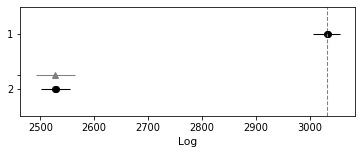

In [23]:
az.plot_compare(w3)

In [52]:
w4=az.compare({"1":a41,"2":a42})
w4

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,3029.421360,1.865674,0.000000,0.928458,24.673757,0.000000,False,log
2,1,2527.333171,2.207277,502.088189,0.071542,27.088639,36.473169,False,log


<AxesSubplot:xlabel='Log'>

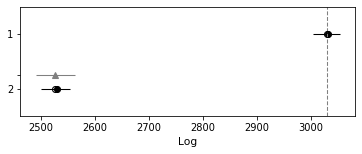

In [25]:
az.plot_compare(w4)

In [26]:
model5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [47]:
nxm=[]
for i in xm:
    nxm.append([i])

nym=[]
for i in ym:
    nym.append([i])    
    
data511=dict(N=N,K=1,y=xm,X=nxm)
result511 = model5.sample(data=data511)


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [48]:
data512=dict(N=N,K=1,y=ym,X=nym)
result512 = model5.sample(data=data512)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [49]:
az.loo(result511)

Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo  2527.33    27.09
p_loo        2.21        -

In [50]:
az.waic(result511)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic  3029.42    24.67
p_waic        1.87        -

In [58]:
az.loo(result512)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo 20002.11     0.02
p_loo      940.79        -

There has been a warning during the calculation. Please check the results.

In [59]:
az.waic(result512)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic 19912.72     0.02
p_waic     1030.19        -

There has been a warning during the calculation. Please check the results.

In [53]:
a511=az.from_cmdstanpy(result511)
a512=az.from_cmdstanpy(result512)

w51=az.compare({"1":a511,"2":a512})
w51

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
2,0,20002.114919,940.790529,0.000000,1.0,0.017206,0.00000,True,log
1,1,19518.819272,910.522926,483.295648,0.0,0.008164,0.01871,True,log


<AxesSubplot:xlabel='Log'>

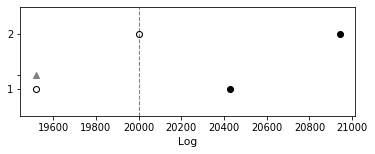

In [54]:
az.plot_compare(w51)

In [56]:
xm1=x.iloc[0,:]
nxm2=[]
for i in range(len(nxm)):
    nxm2.append([xm[i],xm1[i]])
    
data521=dict(N=N,K=2,y=xm,X=nxm2)
result521 = model5.sample(data=data521)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [57]:
ym1=y.iloc[0,:]
nym2=[]
for i in range(len(nym)):
    nym2.append([ym[i],ym1[i]])
    
data522=dict(N=N,K=2,y=ym,X=nym2)
result522 = model5.sample(data=data522)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [60]:
az.loo(result521)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo 16934.43     0.10
p_loo      251.74        -

There has been a warning during the calculation. Please check the results.

In [61]:
az.waic(result521)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic 16928.23     0.10
p_waic      257.94        -

In [62]:
az.loo(result522)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo 16598.00     0.02
p_loo      152.59        -

There has been a warning during the calculation. Please check the results.

In [63]:
az.waic(result522)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic 16595.41     0.03
p_waic      155.18        -

In [64]:
a521=az.from_cmdstanpy(result521)
a522=az.from_cmdstanpy(result522)

w52=az.compare({"1":a521,"2":a522})
w52

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,16934.433630,251.736832,0.000000,1.0,0.101811,0.000000,True,log
2,1,16598.002439,152.588468,336.431191,0.0,0.019380,0.102705,True,log


<AxesSubplot:xlabel='Log'>

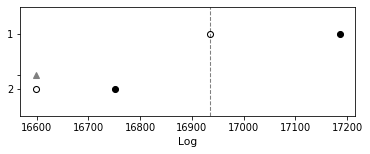

In [65]:
az.plot_compare(w52)

In [67]:
xm2=x.iloc[100,:]
nxm3=[]
for i in range(len(nxm)):
    nxm3.append([xm[i],xm1[i],xm2[i]])
    
data531=dict(N=N,K=3,y=xm,X=nxm3)
result531 = model5.sample(data=data531)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [70]:
ym2=y.iloc[100,:]
nym3=[]
for i in range(len(nym)):
    nym3.append([ym[i],ym1[i],ym2[i]])
    
data532=dict(N=N,K=3,y=ym,X=nym3)
result532 = model5.sample(data=data532)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [71]:
az.loo(result531)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo 16649.71     0.21
p_loo      153.31        -

There has been a warning during the calculation. Please check the results.

In [72]:
az.waic(result532)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic 16644.75     0.03
p_waic      207.95        -

In [73]:
az.loo(result531)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo 16649.71     0.21
p_loo      153.31        -

There has been a warning during the calculation. Please check the results.

In [74]:
az.waic(result532)

Computed from 4000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic 16644.75     0.03
p_waic      207.95        -

In [75]:
a531=az.from_cmdstanpy(result531)
a532=az.from_cmdstanpy(result532)

w53=az.compare({"1":a531,"2":a532})
w53

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,16649.71360,153.312015,0.00000,1.000000e+00,0.205503,0.000000,True,log
2,1,16648.23999,204.456394,1.47361,4.440892e-16,0.033188,0.207362,True,log


<AxesSubplot:xlabel='Log'>

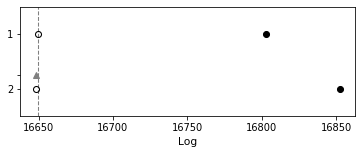

In [76]:
az.plot_compare(w53)